# Introduction to Data Science - Linear Regression

In [79]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

Load the dataframe.

In [80]:
population_df = pd.read_csv('../data/population_df.csv')
population_df

,Gender,Education % 15-24 years Second degree and special vocational training degree,Education % 15-24 years Lowest higher and lower university level,Education % 15-24 years Higher university degree and research training,Education % 15-24 years All levels of education,Education % 15-24 years Elementary or unknown,Education % 15-24 years Total graduates,Education % 25-44 years Second degree and special vocational training degree,Education % 25-44 years Lowest higher and lower university level,Education % 25-44 years Higher university degree and research training,...,Married couple without children,Married couple and children,Unmarried couple without children,Unmarried couple and children,Father and children,Mother and children,municipality,code,name,green area %
0,0,0.059870,0.008553,0.000342,0.116319,0.047554,0.068765,0.105371,0.083134,0.157030,...,0.342429,0.231140,0.248261,0.064205,0.021402,0.092563,91,10,Kruununhaka,9.361723
1,1,0.079023,0.016667,0.000575,0.145402,0.049138,0.096264,0.074138,0.103736,0.157471,...,0.342429,0.231140,0.248261,0.064205,0.021402,0.092563,91,10,Kruununhaka,9.361723
2,0,0.058338,0.007025,0.000000,0.100794,0.035431,0.065363,0.168601,0.136225,0.140195,...,0.320584,0.129346,0.413074,0.055633,0.013908,0.067455,91,101,Vilhonvuori,18.843288
3,1,0.088615,0.018624,0.001502,0.143286,0.034545,0.108741,0.123160,0.141484,0.147792,...,0.320584,0.129346,0.413074,0.055633,0.013908,0.067455,91,101,Vilhonvuori,18.843288
4,0,0.056744,0.008216,0.000382,0.115017,0.049675,0.065342,0.107375,0.081582,0.138135,...,0.354232,0.227415,0.243374,0.058991,0.021659,0.094329,91,101,Vironniemen peruspiiri,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
363,1,0.046091,0.006647,0.000399,0.113049,0.059912,0.053136,0.101443,0.095361,0.100946,...,0.299079,0.275851,0.172889,0.083733,0.022858,0.145590,91,997,Esikaupungit,NaN
364,0,0.068623,0.009455,0.000423,0.122246,0.043744,0.078502,0.148989,0.112253,0.144381,...,0.284940,0.202834,0.311098,0.077402,0.018974,0.104751,91,998,Kantakaupunki,NaN
365,1,0.088223,0.017459,0.001057,0.147080,0.040342,0.106738,0.100800,0.129216,0.164055,...,0.284940,0.202834,0.311098,0.077402,0.018974,0.104751,91,998,Kantakaupunki,NaN
366,0,0.039430,0.002767,0.000000,0.142225,0.100028,0.042197,0.148727,0.036386,0.039568,...,NaN,NaN,NaN,NaN,NaN,NaN,91,999,Muut,NaN


Filter only basic level districs.

In [81]:
population_df = population_df[~population_df['name'].str.contains('peruspiiri')]
population_df

,Gender,Education % 15-24 years Second degree and special vocational training degree,Education % 15-24 years Lowest higher and lower university level,Education % 15-24 years Higher university degree and research training,Education % 15-24 years All levels of education,Education % 15-24 years Elementary or unknown,Education % 15-24 years Total graduates,Education % 25-44 years Second degree and special vocational training degree,Education % 25-44 years Lowest higher and lower university level,Education % 25-44 years Higher university degree and research training,...,Married couple without children,Married couple and children,Unmarried couple without children,Unmarried couple and children,Father and children,Mother and children,municipality,code,name,green area %
0,0,0.059870,0.008553,0.000342,0.116319,0.047554,0.068765,0.105371,0.083134,0.157030,...,0.342429,0.231140,0.248261,0.064205,0.021402,0.092563,91,10,Kruununhaka,9.361723
1,1,0.079023,0.016667,0.000575,0.145402,0.049138,0.096264,0.074138,0.103736,0.157471,...,0.342429,0.231140,0.248261,0.064205,0.021402,0.092563,91,10,Kruununhaka,9.361723
2,0,0.058338,0.007025,0.000000,0.100794,0.035431,0.065363,0.168601,0.136225,0.140195,...,0.320584,0.129346,0.413074,0.055633,0.013908,0.067455,91,101,Vilhonvuori,18.843288
3,1,0.088615,0.018624,0.001502,0.143286,0.034545,0.108741,0.123160,0.141484,0.147792,...,0.320584,0.129346,0.413074,0.055633,0.013908,0.067455,91,101,Vilhonvuori,18.843288
6,0,0.064842,0.009263,0.000421,0.111579,0.037053,0.074526,0.167158,0.135579,0.182316,...,0.291057,0.194038,0.336585,0.087263,0.014092,0.076965,91,102,Kalasatama,1.860516
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
363,1,0.046091,0.006647,0.000399,0.113049,0.059912,0.053136,0.101443,0.095361,0.100946,...,0.299079,0.275851,0.172889,0.083733,0.022858,0.145590,91,997,Esikaupungit,NaN
364,0,0.068623,0.009455,0.000423,0.122246,0.043744,0.078502,0.148989,0.112253,0.144381,...,0.284940,0.202834,0.311098,0.077402,0.018974,0.104751,91,998,Kantakaupunki,NaN
365,1,0.088223,0.017459,0.001057,0.147080,0.040342,0.106738,0.100800,0.129216,0.164055,...,0.284940,0.202834,0.311098,0.077402,0.018974,0.104751,91,998,Kantakaupunki,NaN
366,0,0.039430,0.002767,0.000000,0.142225,0.100028,0.042197,0.148727,0.036386,0.039568,...,NaN,NaN,NaN,NaN,NaN,NaN,91,999,Muut,NaN


Set distric code to index.

In [82]:
population_df = population_df.drop(['municipality', 'name'], axis=1)
population_df = population_df.set_index('code')
population_df.columns = population_df.columns.get_level_values(0)
population_df

,Gender,Education % 15-24 years Second degree and special vocational training degree,Education % 15-24 years Lowest higher and lower university level,Education % 15-24 years Higher university degree and research training,Education % 15-24 years All levels of education,Education % 15-24 years Elementary or unknown,Education % 15-24 years Total graduates,Education % 25-44 years Second degree and special vocational training degree,Education % 25-44 years Lowest higher and lower university level,Education % 25-44 years Higher university degree and research training,...,Outside the labor force,Taxable income per housing association,Taxable income per person,Married couple without children,Married couple and children,Unmarried couple without children,Unmarried couple and children,Father and children,Mother and children,green area %
code,,,,,,,,,,,,,,,,,,,,,
10,0,0.059870,0.008553,0.000342,0.116319,0.047554,0.068765,0.105371,0.083134,0.157030,...,0.184111,81443.0,44080.0,0.342429,0.231140,0.248261,0.064205,0.021402,0.092563,9.361723
10,1,0.079023,0.016667,0.000575,0.145402,0.049138,0.096264,0.074138,0.103736,0.157471,...,0.232195,81443.0,44080.0,0.342429,0.231140,0.248261,0.064205,0.021402,0.092563,9.361723
101,0,0.058338,0.007025,0.000000,0.100794,0.035431,0.065363,0.168601,0.136225,0.140195,...,0.158090,48032.0,30519.0,0.320584,0.129346,0.413074,0.055633,0.013908,0.067455,18.843288
101,1,0.088615,0.018624,0.001502,0.143286,0.034545,0.108741,0.123160,0.141484,0.147792,...,0.200543,48032.0,30519.0,0.320584,0.129346,0.413074,0.055633,0.013908,0.067455,18.843288
102,0,0.064842,0.009263,0.000421,0.111579,0.037053,0.074526,0.167158,0.135579,0.182316,...,0.159760,71436.0,36204.0,0.291057,0.194038,0.336585,0.087263,0.014092,0.076965,1.860516
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
997,1,0.046091,0.006647,0.000399,0.113049,0.059912,0.053136,0.101443,0.095361,0.100946,...,0.265282,55559.0,28197.0,0.299079,0.275851,0.172889,0.083733,0.022858,0.145590,NaN
998,0,0.068623,0.009455,0.000423,0.122246,0.043744,0.078502,0.148989,0.112253,0.144381,...,0.184181,62736.0,36839.0,0.284940,0.202834,0.311098,0.077402,0.018974,0.104751,NaN
998,1,0.088223,0.017459,0.001057,0.147080,0.040342,0.106738,0.100800,0.129216,0.164055,...,0.221443,62736.0,36839.0,0.284940,0.202834,0.311098,0.077402,0.018974,0.104751,NaN


## Multicollinearity

Correlation of variables. Variables related to education.

In [83]:
educational_data = population_df.filter(regex='Education')
corr = educational_data.corr()

<AxesSubplot:>

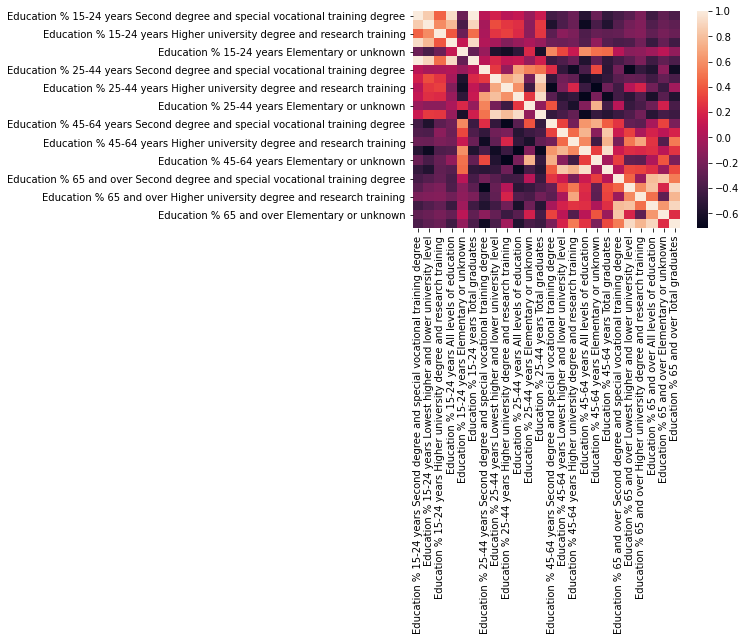

In [84]:
sns.heatmap(corr)

<AxesSubplot:>

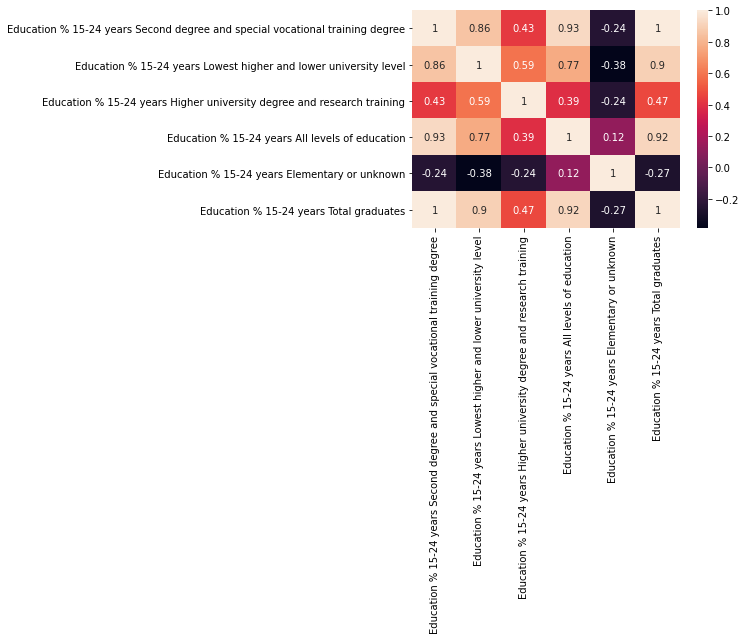

In [85]:
education_15_24 = educational_data.filter(regex='15')
corr = education_15_24.corr()
sns.heatmap(corr, annot=True)

Remove columns which show total graduates and all levels of education.

In [86]:
total_columns = [col for col in population_df.columns if 'Total' in col]
population_df = population_df.drop(columns=total_columns, axis=1)
all_levels_columns = [col for col in population_df.columns if 'All levels' in col]
population_df = population_df.drop(columns=all_levels_columns, axis=1)
population_df

,Gender,Education % 15-24 years Second degree and special vocational training degree,Education % 15-24 years Lowest higher and lower university level,Education % 15-24 years Higher university degree and research training,Education % 15-24 years Elementary or unknown,Education % 25-44 years Second degree and special vocational training degree,Education % 25-44 years Lowest higher and lower university level,Education % 25-44 years Higher university degree and research training,Education % 25-44 years Elementary or unknown,Education % 45-64 years Second degree and special vocational training degree,...,Outside the labor force,Taxable income per housing association,Taxable income per person,Married couple without children,Married couple and children,Unmarried couple without children,Unmarried couple and children,Father and children,Mother and children,green area %
code,,,,,,,,,,,,,,,,,,,,,
10,0,0.059870,0.008553,0.000342,0.047554,0.105371,0.083134,0.157030,0.050975,0.076976,...,0.184111,81443.0,44080.0,0.342429,0.231140,0.248261,0.064205,0.021402,0.092563,9.361723
10,1,0.079023,0.016667,0.000575,0.049138,0.074138,0.103736,0.157471,0.030460,0.042241,...,0.232195,81443.0,44080.0,0.342429,0.231140,0.248261,0.064205,0.021402,0.092563,9.361723
101,0,0.058338,0.007025,0.000000,0.035431,0.168601,0.136225,0.140195,0.083384,0.083995,...,0.158090,48032.0,30519.0,0.320584,0.129346,0.413074,0.055633,0.013908,0.067455,18.843288
101,1,0.088615,0.018624,0.001502,0.034545,0.123160,0.141484,0.147792,0.044157,0.051968,...,0.200543,48032.0,30519.0,0.320584,0.129346,0.413074,0.055633,0.013908,0.067455,18.843288
102,0,0.064842,0.009263,0.000421,0.037053,0.167158,0.135579,0.182316,0.061895,0.065684,...,0.159760,71436.0,36204.0,0.291057,0.194038,0.336585,0.087263,0.014092,0.076965,1.860516
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
997,1,0.046091,0.006647,0.000399,0.059912,0.101443,0.095361,0.100946,0.050709,0.084687,...,0.265282,55559.0,28197.0,0.299079,0.275851,0.172889,0.083733,0.022858,0.145590,NaN
998,0,0.068623,0.009455,0.000423,0.043744,0.148989,0.112253,0.144381,0.070041,0.078010,...,0.184181,62736.0,36839.0,0.284940,0.202834,0.311098,0.077402,0.018974,0.104751,NaN
998,1,0.088223,0.017459,0.001057,0.040342,0.100800,0.129216,0.164055,0.036162,0.054293,...,0.221443,62736.0,36839.0,0.284940,0.202834,0.311098,0.077402,0.018974,0.104751,NaN


<AxesSubplot:>

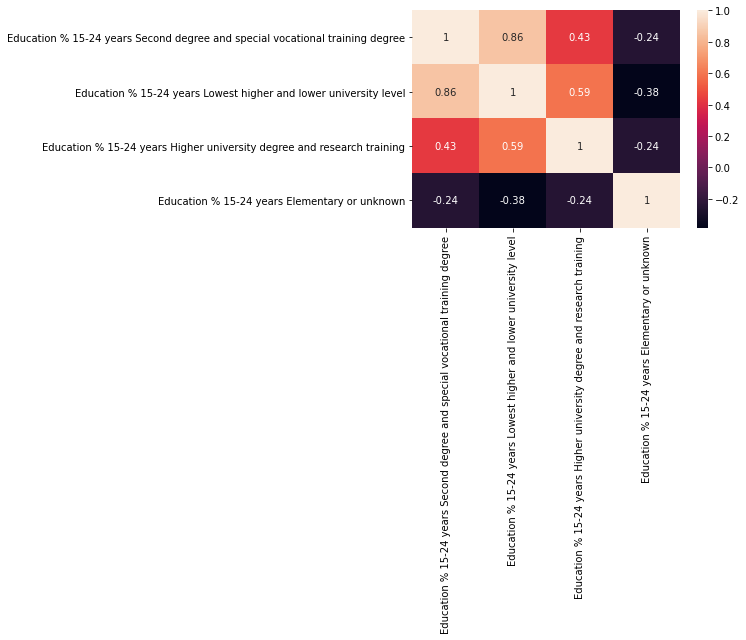

In [87]:
educational_data = population_df.filter(regex='Education % 15')
corr = educational_data.corr()
sns.heatmap(corr, annot=True)

<AxesSubplot:>

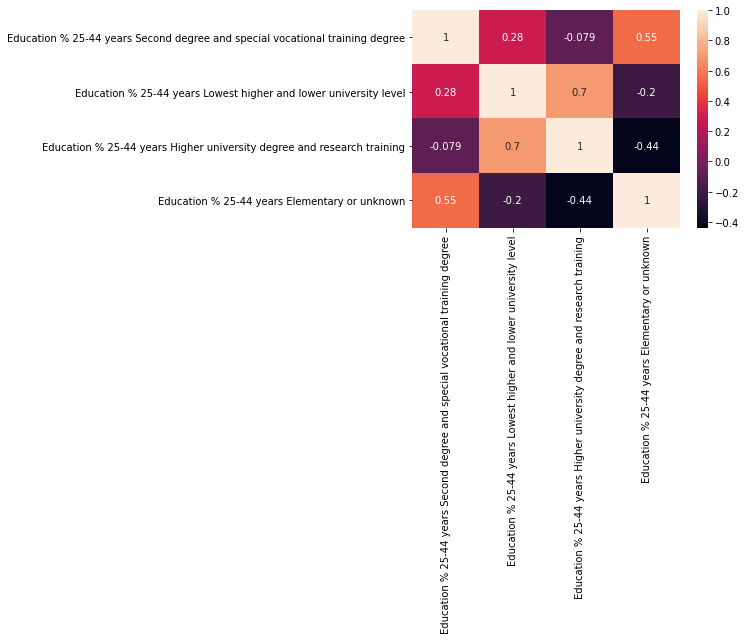

In [88]:
educational_data = population_df.filter(regex='Education % 25')
corr = educational_data.corr()
sns.heatmap(corr, annot=True)

<AxesSubplot:>

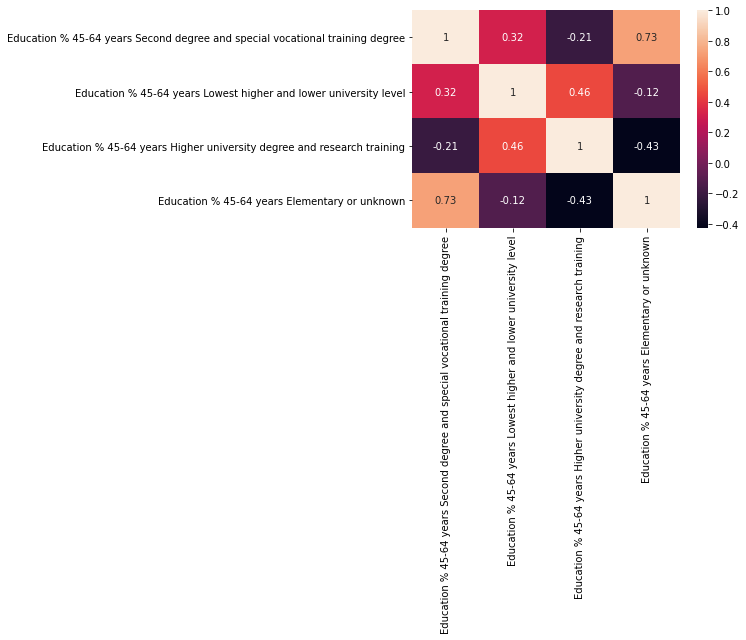

In [89]:
educational_data = population_df.filter(regex='Education % 45')
corr = educational_data.corr()
sns.heatmap(corr, annot=True)

<AxesSubplot:>

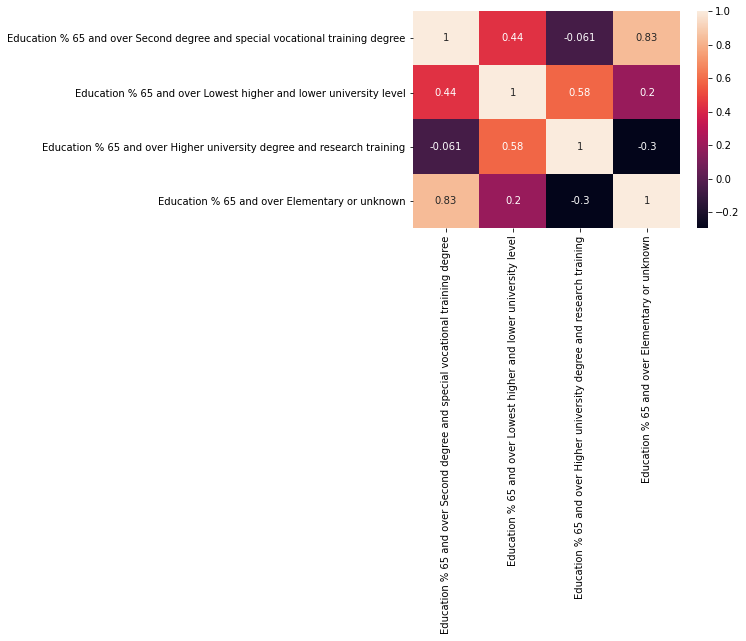

In [90]:
educational_data = population_df.filter(regex='Education % 65')
corr = educational_data.corr()
sns.heatmap(corr, annot=True)

<AxesSubplot:>

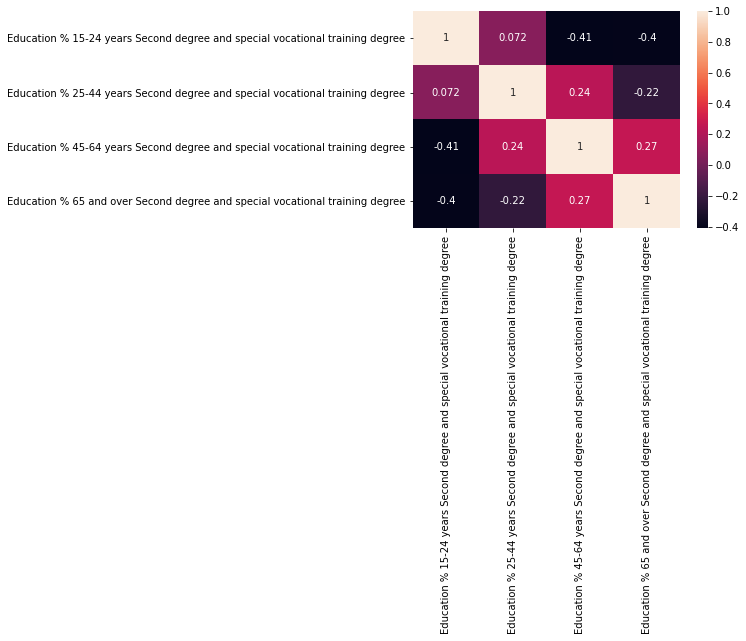

In [91]:
educational_data = population_df.filter(regex='Second degree')
corr = educational_data.corr()
sns.heatmap(corr, annot=True)

<AxesSubplot:>

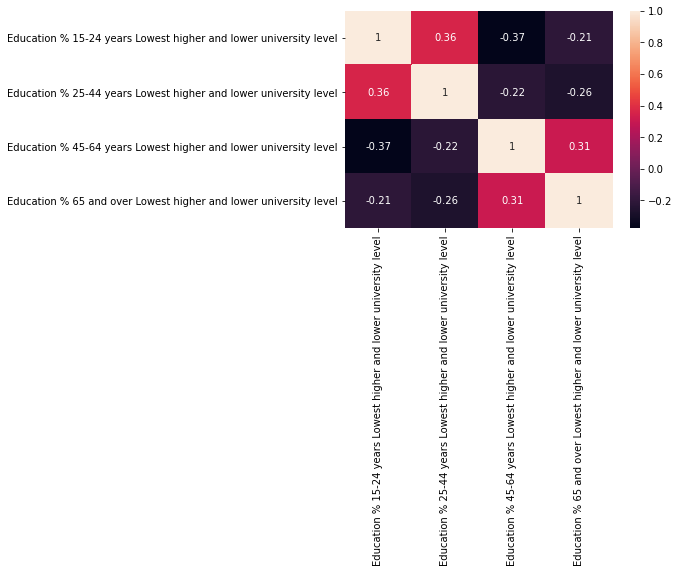

In [92]:
educational_data = population_df.filter(regex='Lowest higher')
corr = educational_data.corr()
sns.heatmap(corr, annot=True)

<AxesSubplot:>

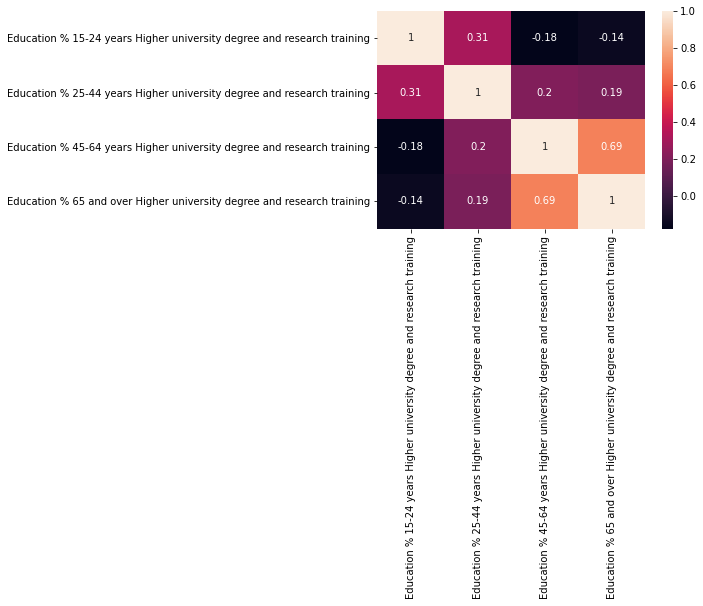

In [93]:
educational_data = population_df.filter(regex='Higher university')
corr = educational_data.corr()
sns.heatmap(corr, annot=True)

<AxesSubplot:>

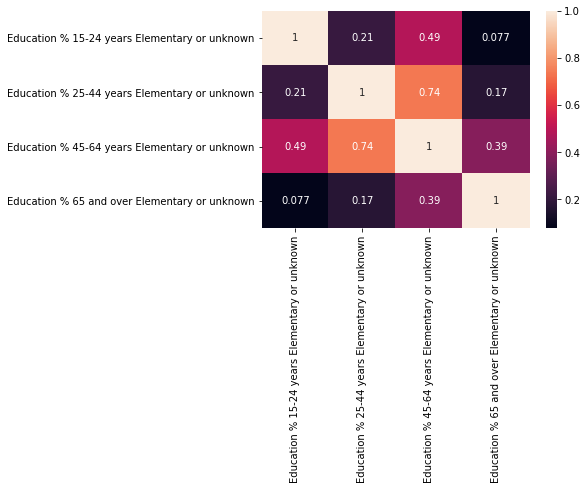

In [94]:
educational_data = population_df.filter(regex='Elementary')
corr = educational_data.corr()
sns.heatmap(corr, annot=True)

Correlation of other variables than educational variables.

In [95]:
educational_variables = population_df.filter(regex='Education')
other_variables = population_df.loc[:, ~population_df.columns.isin(educational_variables)]

<AxesSubplot:>

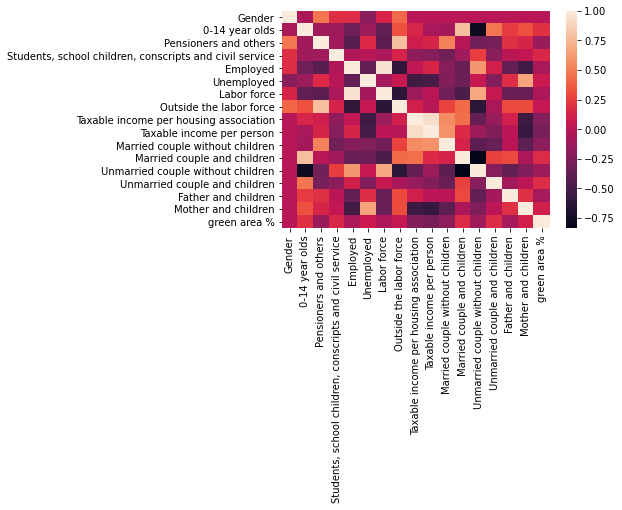

In [96]:
corr = other_variables.corr()
sns.heatmap(corr)

<AxesSubplot:>

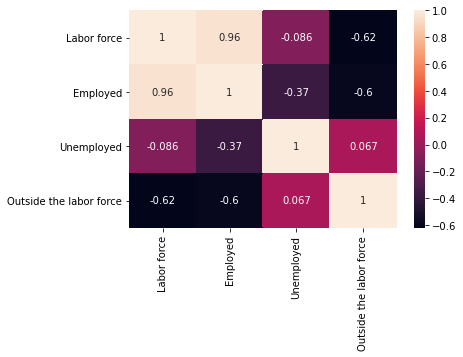

In [97]:
labor_force = population_df[['Labor force', 'Employed', 'Unemployed', 'Outside the labor force']]
corr = labor_force.corr()
sns.heatmap(corr, annot=True)

In [98]:
population_df = population_df.drop(columns=['Labor force'], axis=1)
population_df

,Gender,Education % 15-24 years Second degree and special vocational training degree,Education % 15-24 years Lowest higher and lower university level,Education % 15-24 years Higher university degree and research training,Education % 15-24 years Elementary or unknown,Education % 25-44 years Second degree and special vocational training degree,Education % 25-44 years Lowest higher and lower university level,Education % 25-44 years Higher university degree and research training,Education % 25-44 years Elementary or unknown,Education % 45-64 years Second degree and special vocational training degree,...,Outside the labor force,Taxable income per housing association,Taxable income per person,Married couple without children,Married couple and children,Unmarried couple without children,Unmarried couple and children,Father and children,Mother and children,green area %
code,,,,,,,,,,,,,,,,,,,,,
10,0,0.059870,0.008553,0.000342,0.047554,0.105371,0.083134,0.157030,0.050975,0.076976,...,0.184111,81443.0,44080.0,0.342429,0.231140,0.248261,0.064205,0.021402,0.092563,9.361723
10,1,0.079023,0.016667,0.000575,0.049138,0.074138,0.103736,0.157471,0.030460,0.042241,...,0.232195,81443.0,44080.0,0.342429,0.231140,0.248261,0.064205,0.021402,0.092563,9.361723
101,0,0.058338,0.007025,0.000000,0.035431,0.168601,0.136225,0.140195,0.083384,0.083995,...,0.158090,48032.0,30519.0,0.320584,0.129346,0.413074,0.055633,0.013908,0.067455,18.843288
101,1,0.088615,0.018624,0.001502,0.034545,0.123160,0.141484,0.147792,0.044157,0.051968,...,0.200543,48032.0,30519.0,0.320584,0.129346,0.413074,0.055633,0.013908,0.067455,18.843288
102,0,0.064842,0.009263,0.000421,0.037053,0.167158,0.135579,0.182316,0.061895,0.065684,...,0.159760,71436.0,36204.0,0.291057,0.194038,0.336585,0.087263,0.014092,0.076965,1.860516
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
997,1,0.046091,0.006647,0.000399,0.059912,0.101443,0.095361,0.100946,0.050709,0.084687,...,0.265282,55559.0,28197.0,0.299079,0.275851,0.172889,0.083733,0.022858,0.145590,NaN
998,0,0.068623,0.009455,0.000423,0.043744,0.148989,0.112253,0.144381,0.070041,0.078010,...,0.184181,62736.0,36839.0,0.284940,0.202834,0.311098,0.077402,0.018974,0.104751,NaN
998,1,0.088223,0.017459,0.001057,0.040342,0.100800,0.129216,0.164055,0.036162,0.054293,...,0.221443,62736.0,36839.0,0.284940,0.202834,0.311098,0.077402,0.018974,0.104751,NaN


<AxesSubplot:>

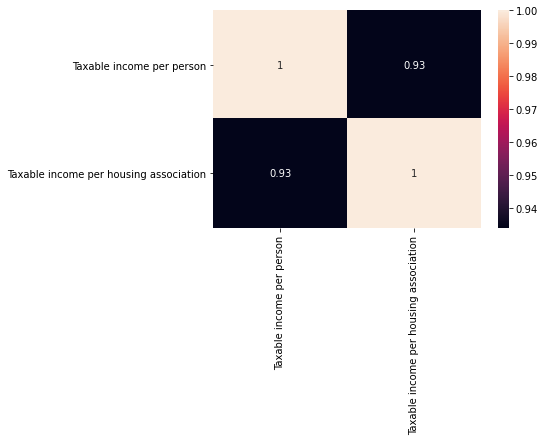

In [99]:
taxable_income = population_df[['Taxable income per person', 'Taxable income per housing association']]
corr = taxable_income.corr()
sns.heatmap(corr, annot=True)

In [100]:
population_df = population_df.drop(columns=['Taxable income per person'], axis=1)
population_df

,Gender,Education % 15-24 years Second degree and special vocational training degree,Education % 15-24 years Lowest higher and lower university level,Education % 15-24 years Higher university degree and research training,Education % 15-24 years Elementary or unknown,Education % 25-44 years Second degree and special vocational training degree,Education % 25-44 years Lowest higher and lower university level,Education % 25-44 years Higher university degree and research training,Education % 25-44 years Elementary or unknown,Education % 45-64 years Second degree and special vocational training degree,...,Unemployed,Outside the labor force,Taxable income per housing association,Married couple without children,Married couple and children,Unmarried couple without children,Unmarried couple and children,Father and children,Mother and children,green area %
code,,,,,,,,,,,,,,,,,,,,,
10,0,0.059870,0.008553,0.000342,0.047554,0.105371,0.083134,0.157030,0.050975,0.076976,...,0.020070,0.184111,81443.0,0.342429,0.231140,0.248261,0.064205,0.021402,0.092563,9.361723
10,1,0.079023,0.016667,0.000575,0.049138,0.074138,0.103736,0.157471,0.030460,0.042241,...,0.019652,0.232195,81443.0,0.342429,0.231140,0.248261,0.064205,0.021402,0.092563,9.361723
101,0,0.058338,0.007025,0.000000,0.035431,0.168601,0.136225,0.140195,0.083384,0.083995,...,0.036592,0.158090,48032.0,0.320584,0.129346,0.413074,0.055633,0.013908,0.067455,18.843288
101,1,0.088615,0.018624,0.001502,0.034545,0.123160,0.141484,0.147792,0.044157,0.051968,...,0.029017,0.200543,48032.0,0.320584,0.129346,0.413074,0.055633,0.013908,0.067455,18.843288
102,0,0.064842,0.009263,0.000421,0.037053,0.167158,0.135579,0.182316,0.061895,0.065684,...,0.017281,0.159760,71436.0,0.291057,0.194038,0.336585,0.087263,0.014092,0.076965,1.860516
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
997,1,0.046091,0.006647,0.000399,0.059912,0.101443,0.095361,0.100946,0.050709,0.084687,...,0.027448,0.265282,55559.0,0.299079,0.275851,0.172889,0.083733,0.022858,0.145590,NaN
998,0,0.068623,0.009455,0.000423,0.043744,0.148989,0.112253,0.144381,0.070041,0.078010,...,0.027535,0.184181,62736.0,0.284940,0.202834,0.311098,0.077402,0.018974,0.104751,NaN
998,1,0.088223,0.017459,0.001057,0.040342,0.100800,0.129216,0.164055,0.036162,0.054293,...,0.023280,0.221443,62736.0,0.284940,0.202834,0.311098,0.077402,0.018974,0.104751,NaN


<AxesSubplot:>

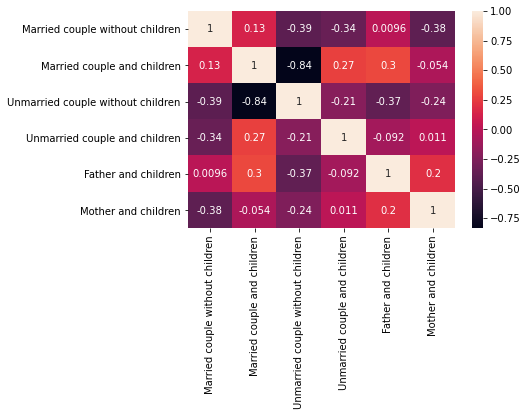

In [101]:
family_status = population_df[['Married couple without children',
                               'Married couple and children',
                               'Unmarried couple without children',
                               'Unmarried couple and children',
                               'Father and children',
                               'Mother and children']]
corr = family_status.corr()
sns.heatmap(corr, annot=True)

<AxesSubplot:>

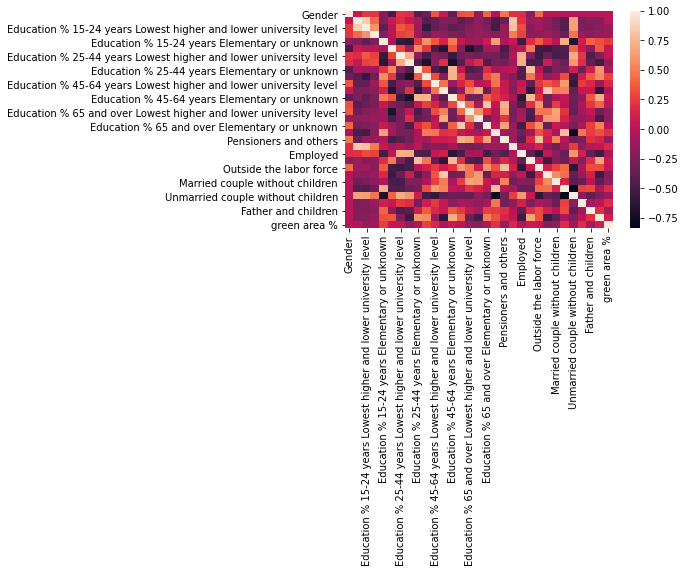

In [102]:
corr = population_df.corr()
sns.heatmap(corr)

## Linear Regression

In [103]:
target = population_df['green area %']
features = population_df.drop('green area %', axis=1)

In [104]:
features.columns

Index(['Gender',
       'Education % 15-24 years Second degree and special vocational training degree',
       'Education % 15-24 years Lowest higher and lower university level',
       'Education % 15-24 years Higher university degree and research training',
       'Education % 15-24 years Elementary or unknown',
       'Education % 25-44 years Second degree and special vocational training degree',
       'Education % 25-44 years Lowest higher and lower university level',
       'Education % 25-44 years Higher university degree and research training',
       'Education % 25-44 years Elementary or unknown',
       'Education % 45-64 years Second degree and special vocational training degree',
       'Education % 45-64 years Lowest higher and lower university level',
       'Education % 45-64 years Higher university degree and research training',
       'Education % 45-64 years Elementary or unknown',
       'Education % 65 and over Second degree and special vocational training degree',

In [105]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [106]:
model = sm.OLS(y_train, X_train, missing='drop').fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:           green area %   R-squared (uncentered):                   0.888
Model:                            OLS   Adj. R-squared (uncentered):              0.814
Method:                 Least Squares   F-statistic:                              12.10
Date:                Sun, 15 Oct 2023   Prob (F-statistic):                    1.86e-13
Time:                        12:26:01   Log-Likelihood:                         -296.65
No. Observations:                  76   AIC:                                      653.3
Df Residuals:                      46   BIC:                                      723.2
Df Model:                          30                                                  
Covariance Type:            nonrobust                                                  
                                                                                   coef    std err          t      P>|t|

## Feature selection

In [108]:
population_df_feature_selection = population_df.dropna()
population_df_feature_selection.isna().sum()

Gender                                                                          0
Education % 15-24 years Second degree and special vocational training degree    0
Education % 15-24 years Lowest higher and lower university level                0
Education % 15-24 years Higher university degree and research training          0
Education % 15-24 years Elementary or unknown                                   0
Education % 25-44 years Second degree and special vocational training degree    0
Education % 25-44 years Lowest higher and lower university level                0
Education % 25-44 years Higher university degree and research training          0
Education % 25-44 years Elementary or unknown                                   0
Education % 45-64 years Second degree and special vocational training degree    0
Education % 45-64 years Lowest higher and lower university level                0
Education % 45-64 years Higher university degree and research training          0
Education % 45-6

In [109]:
population_df_feature_selection.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97 entries, 111 to 80
Data columns (total 31 columns):
 #   Column                                                                        Non-Null Count  Dtype  
---  ------                                                                        --------------  -----  
 0   Gender                                                                        97 non-null     int64  
 1   Education % 15-24 years Second degree and special vocational training degree  97 non-null     float64
 2   Education % 15-24 years Lowest higher and lower university level              97 non-null     float64
 3   Education % 15-24 years Higher university degree and research training        97 non-null     float64
 4   Education % 15-24 years Elementary or unknown                                 97 non-null     float64
 5   Education % 25-44 years Second degree and special vocational training degree  97 non-null     float64
 6   Education % 25-44 years Lowest hig

In [110]:
large_values = (population_df_feature_selection > 1e10).any()
print(large_values)

Gender                                                                          False
Education % 15-24 years Second degree and special vocational training degree    False
Education % 15-24 years Lowest higher and lower university level                False
Education % 15-24 years Higher university degree and research training          False
Education % 15-24 years Elementary or unknown                                   False
Education % 25-44 years Second degree and special vocational training degree    False
Education % 25-44 years Lowest higher and lower university level                False
Education % 25-44 years Higher university degree and research training          False
Education % 25-44 years Elementary or unknown                                   False
Education % 45-64 years Second degree and special vocational training degree    False
Education % 45-64 years Lowest higher and lower university level                False
Education % 45-64 years Higher university degree and r

In [111]:
is_infinite = np.isinf(population_df_feature_selection).any()
print(is_infinite)

Gender                                                                          False
Education % 15-24 years Second degree and special vocational training degree    False
Education % 15-24 years Lowest higher and lower university level                False
Education % 15-24 years Higher university degree and research training          False
Education % 15-24 years Elementary or unknown                                   False
Education % 25-44 years Second degree and special vocational training degree    False
Education % 25-44 years Lowest higher and lower university level                False
Education % 25-44 years Higher university degree and research training          False
Education % 25-44 years Elementary or unknown                                   False
Education % 45-64 years Second degree and special vocational training degree    False
Education % 45-64 years Lowest higher and lower university level                False
Education % 45-64 years Higher university degree and r

In [112]:
threshold = 2
outlier_mask = (abs(stats.zscore(population_df_feature_selection)) > threshold).any(axis=1)
population_df_feature_selection_no_outliers = population_df_feature_selection[~outlier_mask]

In [113]:
population_df_feature_selection_no_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47 entries, 111 to 70
Data columns (total 31 columns):
 #   Column                                                                        Non-Null Count  Dtype  
---  ------                                                                        --------------  -----  
 0   Gender                                                                        47 non-null     int64  
 1   Education % 15-24 years Second degree and special vocational training degree  47 non-null     float64
 2   Education % 15-24 years Lowest higher and lower university level              47 non-null     float64
 3   Education % 15-24 years Higher university degree and research training        47 non-null     float64
 4   Education % 15-24 years Elementary or unknown                                 47 non-null     float64
 5   Education % 25-44 years Second degree and special vocational training degree  47 non-null     float64
 6   Education % 25-44 years Lowest hig

In [114]:
target = population_df_feature_selection_no_outliers['green area %']
features = population_df_feature_selection_no_outliers.drop('green area %', axis=1)

In [115]:
X_train_fs, X_test_fs, fs = select_features(features, target, features)
for i in range(len(fs.scores_)):
    print(f'Feature {i}: {fs.scores_[i]}')

Feature 0: 2.204125707442685
Feature 1: 0.06819354314235979
Feature 2: 0.26946540184673207
Feature 3: 1.2673140736996602
Feature 4: 0.16406023587141894
Feature 5: 0.007597581846222411
Feature 6: 0.8263544111830452
Feature 7: 0.11113583766108888
Feature 8: 0.18641526410219403
Feature 9: 0.00857840180235092
Feature 10: 0.5532672449905446
Feature 11: 0.7626969132018555
Feature 12: 0.08985759667599388
Feature 13: 2.188331162315838
Feature 14: 0.027821833452733122
Feature 15: 2.6690090957728767
Feature 16: 0.3725933990590827
Feature 17: 2.782672645769139
Feature 18: 0.9549935776260129
Feature 19: 11.43251426098068
Feature 20: 0.3795158126951307
Feature 21: 0.4107455695853139
Feature 22: 7.247332357069669
Feature 23: 3.403871832857771
Feature 24: 3.226798722600556
Feature 25: 1.5809487452764444
Feature 26: 1.670457236766938
Feature 27: 4.370744267998604
Feature 28: 0.34458468731252045
Feature 29: 5.765304957662966


In [116]:
def select_features(X_train, y_train, X_test):
    fs = SelectKBest(score_func=f_regression, k='all')
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

In [117]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [118]:
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))

Feature 0: 0.075636
Feature 1: 0.006137
Feature 2: 0.110980
Feature 3: 1.440902
Feature 4: 0.160251
Feature 5: 0.416172
Feature 6: 0.118236
Feature 7: 0.014111
Feature 8: 0.476025
Feature 9: 0.128143
Feature 10: 0.010199
Feature 11: 0.015460
Feature 12: 0.084236
Feature 13: 1.675952
Feature 14: 1.221368
Feature 15: 0.109409
Feature 16: 0.057178
Feature 17: 0.038446
Feature 18: 2.179505
Feature 19: 6.297162
Feature 20: 0.120702
Feature 21: 0.473491
Feature 22: 3.730626
Feature 23: 3.990625
Feature 24: 1.982201
Feature 25: 0.320551
Feature 26: 0.398689
Feature 27: 2.452240
Feature 28: 0.293683
Feature 29: 2.958021


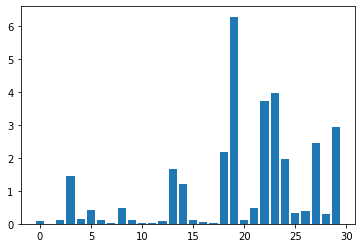

In [119]:
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

A bar chart of the feature importance scores for each input feature is created.
The plot clearly shows 10 features are a lot more important than the other features.
We could set k=10 When configuring the SelectKBest to select these top features.

In [120]:
model_fs = LinearRegression()
model_fs.fit(X_train_fs, y_train)
yhat = model_fs.predict(X_test_fs)
mae = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % mae)

MAE: 26.096
